In [ ]:
# Mounting Google Drive

from google.colab import drive
drive.mount('drive/')

Mounted at drive/


In [ ]:
path_to_dataset = r'/content/drive/MyDrive/Eziline/messages.csv'

In [2]:
import numpy as np
import pandas as pd


In [3]:
df=pd.read_csv('C:/Users/Hp Aero/Documents/Datasets/spam_ham_dataset.csv') #my dataset

In [4]:
df.sample(7)

,Unnamed: 0,label,text,label_num
630,51,ham,"Subject: hpl nominations for december 28 , 199...",0
265,1666,ham,Subject: enron / hpl actuals for september 21 ...,0
1501,4226,spam,Subject: hot wifes\r\nclick here to be removed...,1
934,2836,ham,Subject: txu fuels / sds nomination for april ...,0
840,2797,ham,Subject: re : noms / actual flow for 03 / 20 /...,0
2041,4199,spam,Subject: take a look melcher sightseer\r\nlow ...,1
2604,2132,ham,"Subject: volume changes - december , 2000\r\np...",0


**Analysing** **the** **Data**

In [5]:
from sklearn.preprocessing import LabelEncoder
preprocessing_encoder = LabelEncoder()

In [6]:
#For checking whether there are any missing values in the data or not
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [7]:
#Drop the null values in subject
df.dropna(subset=['subject'], inplace=True)


KeyError: ['subject']

In [8]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [9]:
#Check for duplicate values in the dataset
df.duplicated().sum()

0

In [10]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(5171, 4)

**Exploratory data analysis**

In [13]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [14]:
df['label'].value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1ea6c4c1a90>,
 [Text(-0.6745093333607546, 0.8689287423081543, 'non-spam'),
  Text(0.6745094147157317, -0.868928679156029, 'spam')],
 [Text(-0.3679141818331388, 0.4739611321680841, '71.01'),
  Text(0.3679142262085809, -0.4739610977214703, '28.99')])

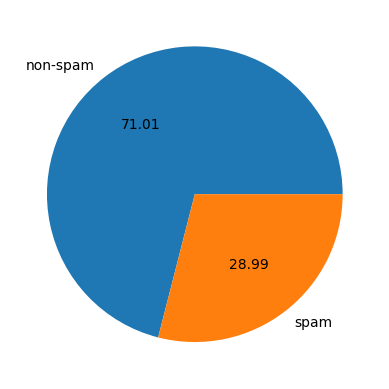

In [15]:
#Plotting the graph
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['non-spam', 'spam'], autopct="%0.2f")

In [ ]:
#As we can see that the data we have is imbalanced

In [16]:
import nltk


In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Hp
[nltk_data]     Aero\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_sub_characters']=df['text'].apply(len)

In [22]:
df.head()

,Unnamed: 0,label,text,label_num,num_sub_characters
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


In [ ]:
df['num_msg_characters']=df['message'].apply(len) #used til here

In [ ]:
df.head()

,subject,message,label,num_sub_characters,num_msg_characters
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,39,2856
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,50,1435
3,risk,a colleague and i are researching the differin...,0,4,324
4,request book information,earlier this morning i was on the phone with a...,0,24,1046
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0,51,4492


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2814 entries, 0 to 2892
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   subject             2814 non-null   object
 1   message             2814 non-null   object
 2   label               2814 non-null   int64 
 3   num_sub_characters  2814 non-null   int64 
 4   num_msg_characters  2814 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 131.9+ KB


In [ ]:
df.head()

,subject,message,label,num_sub_characters,num_msg_characters
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,39,2856
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,50,1435
3,risk,a colleague and i are researching the differin...,0,4,324
4,request book information,earlier this morning i was on the phone with a...,0,24,1046
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0,51,4492


In [ ]:
#Now to fetch the number of words from subject
df['subject'].apply(lambda x:len(nltk.word_tokenize(x)))

0        6
2        7
3        1
4        3
5        8
        ..
2888     5
2889     7
2890     5
2891    13
2892     7
Name: subject, Length: 2814, dtype: int64

In [ ]:
#Now to fetch the number of words from message
df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

0       584
2       280
3        60
4       232
5       861
       ... 
2888     58
2889    533
2890    211
2891    617
2892    177
Name: message, Length: 2814, dtype: int64

In [ ]:
df['words_subject'] = df['subject'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df['words_msg'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()


,subject,message,label,num_sub_characters,num_msg_characters,words_subject,words_msg
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,39,2856,6,584
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,50,1435,7,280
3,risk,a colleague and i are researching the differin...,0,4,324,1,60
4,request book information,earlier this morning i was on the phone with a...,0,24,1046,3,232
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0,51,4492,8,861


In [ ]:
df['sentences_subject'] = df['subject'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df['sentences_msg'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,subject,message,label,num_sub_characters,num_msg_characters,words_subject,words_msg,sentences_subject,sentences_msg
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,39,2856,6,584,1,22
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,50,1435,7,280,1,19
3,risk,a colleague and i are researching the differin...,0,4,324,1,60,1,4
4,request book information,earlier this morning i was on the phone with a...,0,24,1046,3,232,1,12
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0,51,4492,8,861,1,58


In [ ]:
df[['num_sub_characters',	'num_msg_characters',	'words_subject', 'words_msg',	'sentences_subject',	'sentences_msg']].describe()

,num_sub_characters,num_msg_characters,words_subject,words_msg,sentences_subject,sentences_msg
count,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000
mean,32.476546,3240.960554,5.953092,676.821606,1.240227,44.517058
std,15.774788,3685.167456,3.504190,812.990832,0.731109,83.883132
min,1.000000,17.000000,1.000000,3.000000,1.000000,1.000000
25%,21.000000,950.500000,4.000000,192.250000,1.000000,11.000000
50%,31.000000,2029.000000,5.000000,403.000000,1.000000,21.000000
75%,42.000000,4030.750000,8.000000,825.750000,1.000000,45.000000
max,161.000000,28649.000000,33.000000,6608.000000,15.000000,1500.000000


In [ ]:
df[df['label']==0][['num_sub_characters',	'num_msg_characters',	'words_subject', 'words_msg',	'sentences_subject',	'sentences_msg']].describe()

,num_sub_characters,num_msg_characters,words_subject,words_msg,sentences_subject,sentences_msg
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,32.678677,3130.379822,5.749046,630.457397,1.150064,41.286562
std,15.299670,3297.716213,3.261662,685.429635,0.430435,83.020201
min,1.000000,17.000000,1.000000,3.000000,1.000000,1.000000
25%,21.000000,1023.000000,3.000000,204.000000,1.000000,11.000000
50%,31.000000,2060.000000,5.000000,403.000000,1.000000,20.000000
75%,43.000000,3886.000000,7.000000,784.000000,1.000000,41.000000
max,85.000000,28649.000000,21.000000,6608.000000,5.000000,1500.000000


In [ ]:
df[df['label']==1][['num_sub_characters',	'num_msg_characters',	'words_subject', 'words_msg',	'sentences_subject',	'sentences_msg']].describe()

,num_sub_characters,num_msg_characters,words_subject,words_msg,sentences_subject,sentences_msg
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,31.428571,3814.279121,7.010989,917.202198,1.707692,61.265934
std,18.021122,5222.017845,4.414869,1259.397077,1.445122,86.397667
min,1.000000,46.000000,1.000000,13.000000,1.000000,1.000000
25%,21.000000,623.000000,4.000000,136.500000,1.000000,12.000000
50%,29.000000,1725.000000,6.000000,402.000000,1.000000,25.000000
75%,39.000000,4967.000000,9.000000,1154.500000,2.000000,72.000000
max,161.000000,28571.000000,33.000000,6586.000000,15.000000,483.000000


In [ ]:
#Now for plotting the labels of spam and non-spam emails
import seaborn as sns

<Axes: xlabel='num_msg_characters', ylabel='Count'>

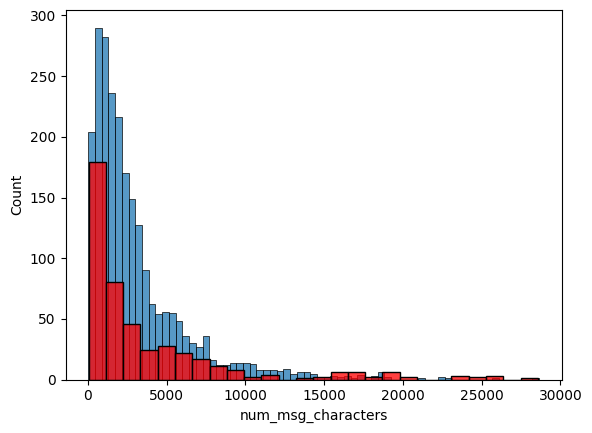

In [ ]:
sns.histplot(df[df['label']==0]['num_msg_characters'])
sns.histplot(df[df['label']==1]['num_msg_characters'],color='red')

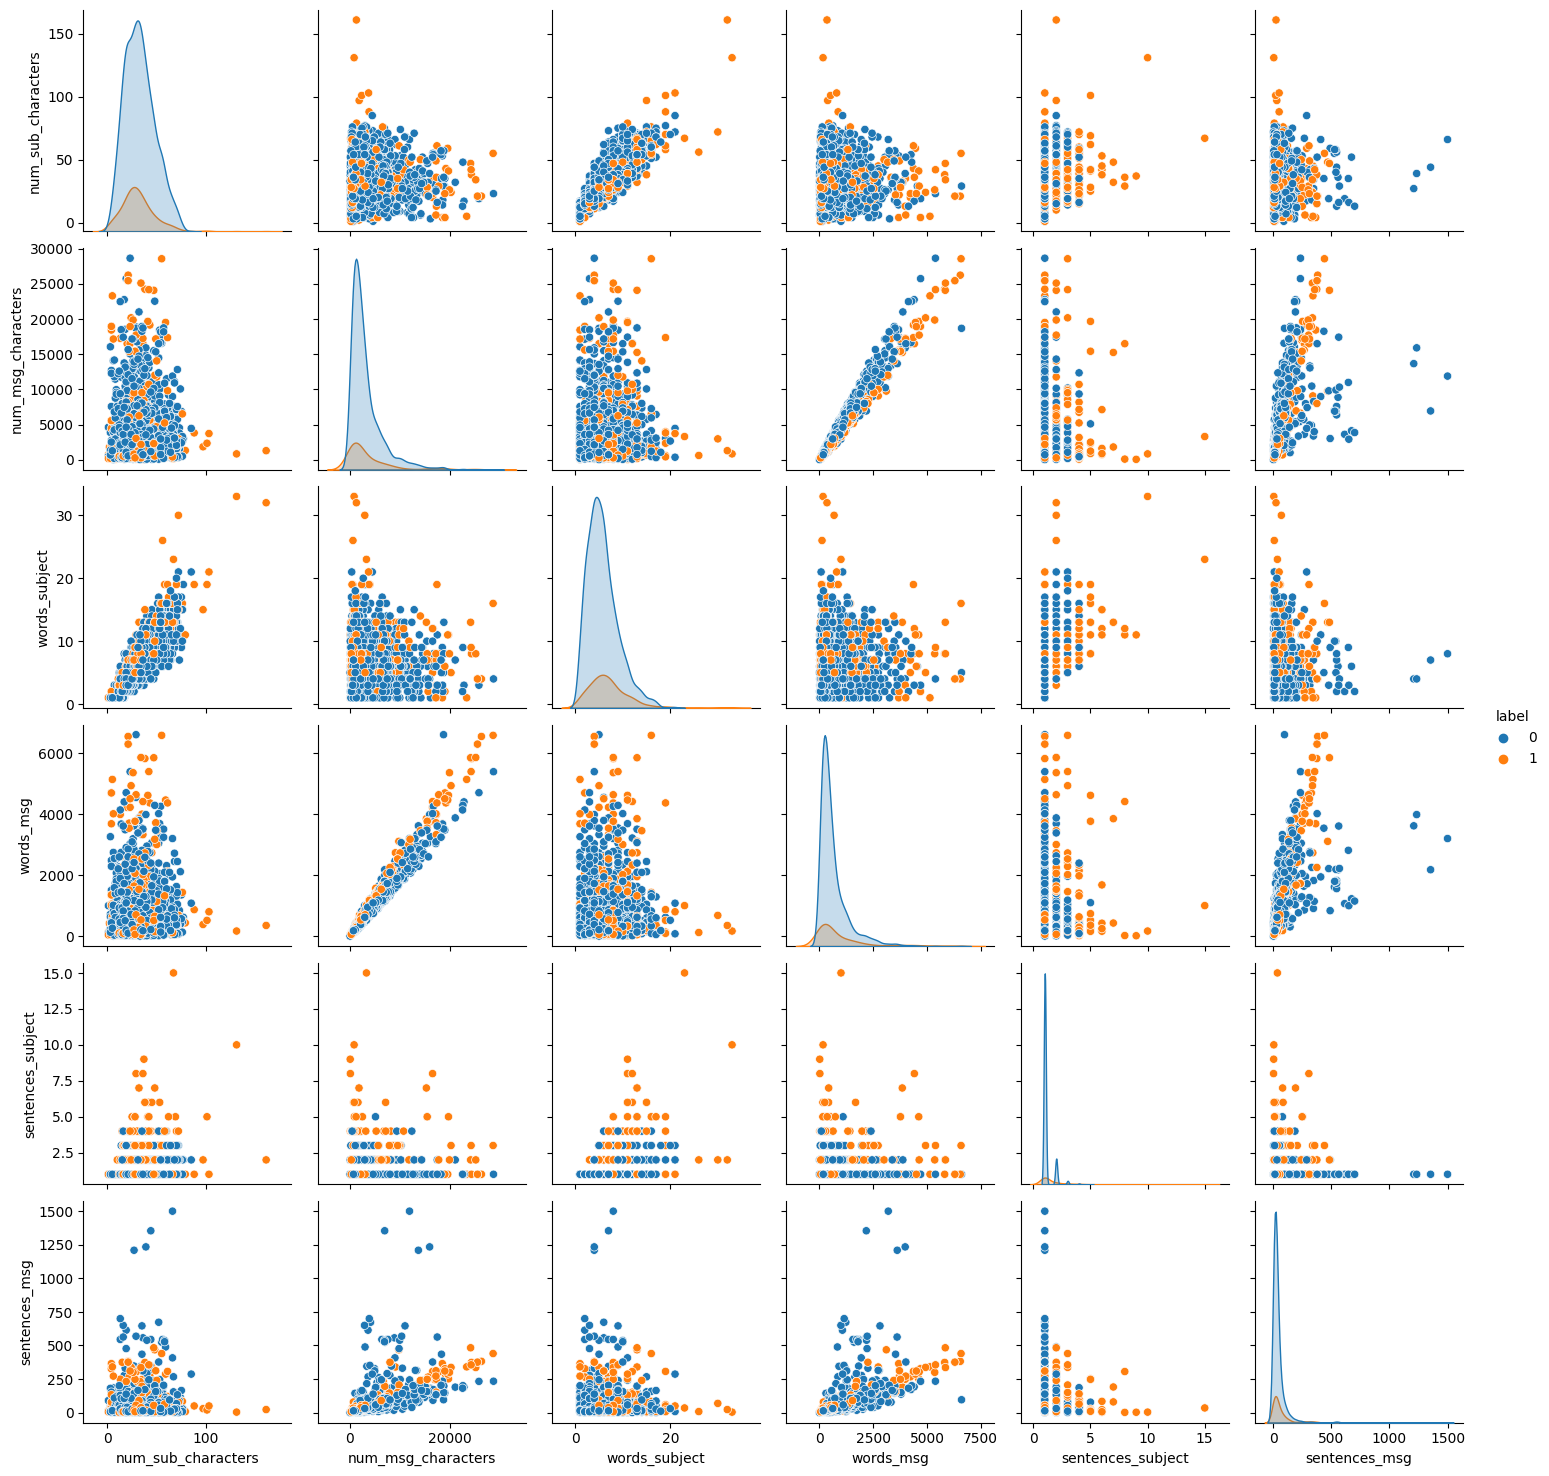

In [ ]:
sns.pairplot(df,hue='label')

<ipython-input-41-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

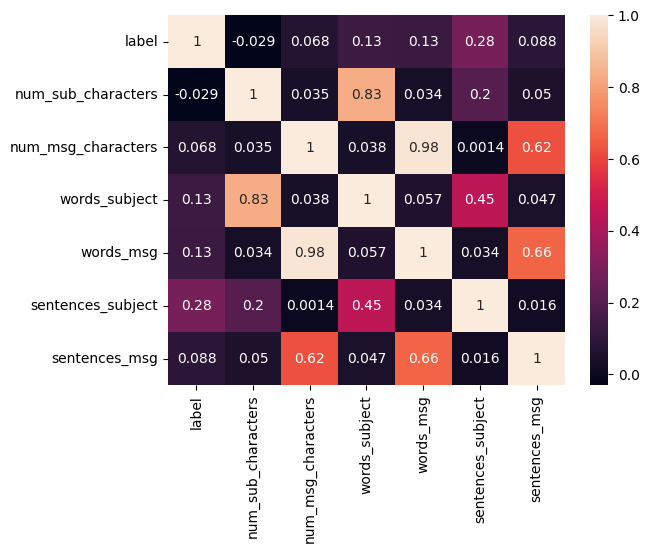

In [ ]:
sns.heatmap(df.corr(),annot=True)

**Text** **Preprocessing**

In [ ]:
#Lower Case
#Tokenization
#Removing Special Characters
#Removing Stop Words and Punctuations
#Stemming (means that we convert dance, dances , danced, dancing into one, i.e dance)

In [ ]:
!pip install nltk

In [ ]:
import string
nltk.download('stopwords')
string.punctuation
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def transform_text(message):
  message=message.lower()
  message=nltk.word_tokenize(message)
  y=[]
  for i in message:
     if i.isalnum():
        y.append(i)
  message = y[:]
  y.clear()

  for i in message:
       if i not in stopwords.words('english') and i not in string.punctuation:
        y.append(i)

  message = y[:]
  y.clear()

  for i in message:
       y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('dancing')

'danc'

In [ ]:
transform_text('Hi My name iS % Ineb Rahim, are you fine?')

'hi name rehan mahmood fine'

In [ ]:
df['transformed_text'] = df['message'].apply(transform_text)

In [ ]:

df.head()

,subject,message,label,num_sub_characters,num_msg_characters,words_subject,words_msg,sentences_subject,sentences_msg,transformed_text
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,39,2856,6,584,1,22,content length 3386 research center us 10 mill...
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,50,1435,7,280,1,19,post inquiri sergei atama satama umabnet ab um...
3,risk,a colleague and i are researching the differin...,0,4,324,1,60,1,4,colleagu research differ degre risk perceiv ho...
4,request book information,earlier this morning i was on the phone with a...,0,24,1046,3,232,1,12,earlier morn phone friend mine live south amer...
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0,51,4492,8,861,1,58,content length 4437 call paper best good enoug...


In [ ]:
from wordcloud import WordCloud
WC = WordCloud(width=500, height=500, min_font_size=10, background_color= 'white')

In [ ]:
non_spam_wc = WC.generate(df[df['label']==0]['transformed_text'].str.cat(sep=""))

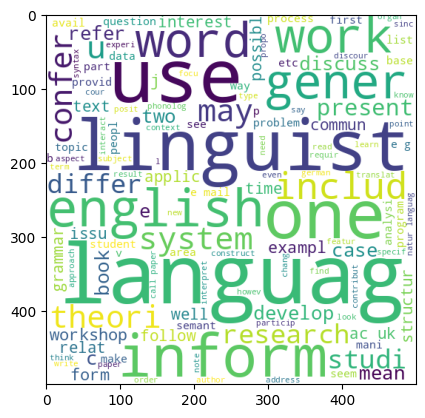

In [ ]:
plt.imshow(non_spam_wc)

In [ ]:
spam_wc = WC.generate(df[df['label']==1]['transformed_text'].str.cat(sep=""))

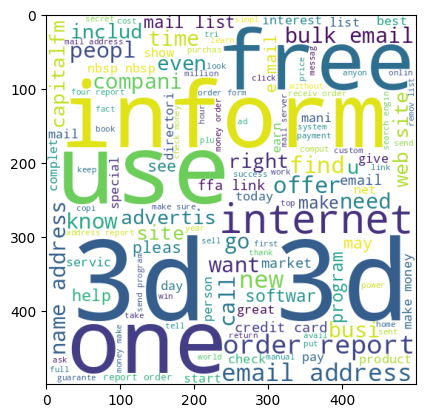

In [ ]:
plt.imshow(spam_wc)

**Vectorizing** **the** **Data** **using** **BOW**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [ ]:
X= tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(2814, 46766)

In [ ]:
y = df['label'].values

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

**Train** **Test** **Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=2)

**Naive Bayes Model**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [ ]:
multinomial_nb = MultinomialNB()


In [ ]:
multinomial_nb.fit(X_train, y_train)
y_prediction = multinomial_nb.predict(X_test)
print(confusion_matrix(y_test,y_prediction))
print(precision_score(y_test,y_prediction))
print(accuracy_score(y_test,y_prediction))

[[709   0]
 [119  17]]
1.0
0.8591715976331361


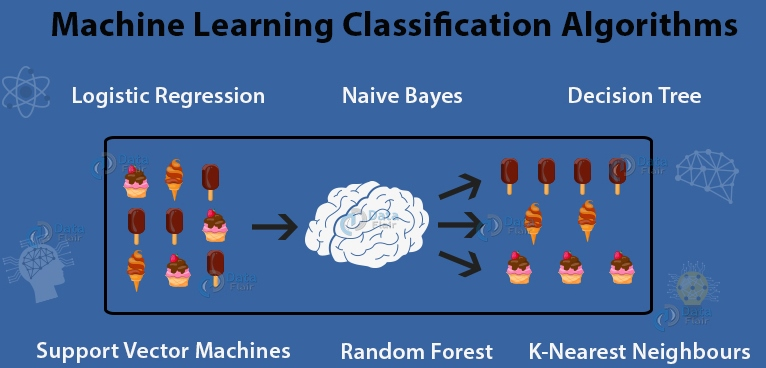

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
svc = SVC(probability=True,kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
j48 = DecisionTreeClassifier(random_state=2)


# New Section

In [ ]:
classifiers = {
    'SVC' : svc,
    'KN' : knc,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'J48': j48,
}

In [ ]:
def model_train_classifier(classifier,X_train,y_train,X_test,y_test):
    classifier.fit(X_train,y_train)
    y_predict = classifier.predict(X_test)
    precision = precision_score(y_test,y_predict)
    accuracy = accuracy_score(y_test,y_predict)

    return accuracy,precision

**SVM Model Precision and Accuracy**

In [ ]:
model_train_classifier(svc,X_train,y_train,X_test,y_test)


(0.9893491124260355, 1.0)

In [ ]:
accuracy_scores = []
precision_scores = []

for model_name,classifier in classifiers.items():

    current_accuracy,current_precision = model_train_classifier(classifier, X_train,y_train,X_test,y_test)

    print("For ",model_name)
    print("Precision*",current_precision)
    print("Accuracy* ",current_accuracy)
    precision_scores.append(current_precision)
    accuracy_scores.append(current_accuracy)


For  SVC
Precision* 1.0
Accuracy*  0.9893491124260355
For  KN
Precision* 0.9682539682539683
Accuracy*  0.978698224852071
For  DT
Precision* 0.9459459459459459
Accuracy*  0.9562130177514793
For  LR
Precision* 1.0
Accuracy*  0.9692307692307692
For  RF
Precision* 1.0
Accuracy*  0.9798816568047337
For  J48
Precision* 0.8759124087591241
Accuracy*  0.9609467455621302


In [ ]:
metric_df = pd.DataFrame({'Models':classifiers.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [ ]:
metric_df

,Models,Accuracy,Precision
0,SVC,0.989349,1.000000
3,LR,0.969231,1.000000
4,RF,0.979882,1.000000
1,KN,0.978698,0.968254
2,DT,0.956213,0.945946
5,J48,0.960947,0.875912


**Model Improvement & Evaluation**

In [ ]:
from sklearn.metrics import log_loss

losses = {}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    proba = classifier.predict_proba(X_test)
    loss = log_loss(y_test, proba)
    losses[name] = loss


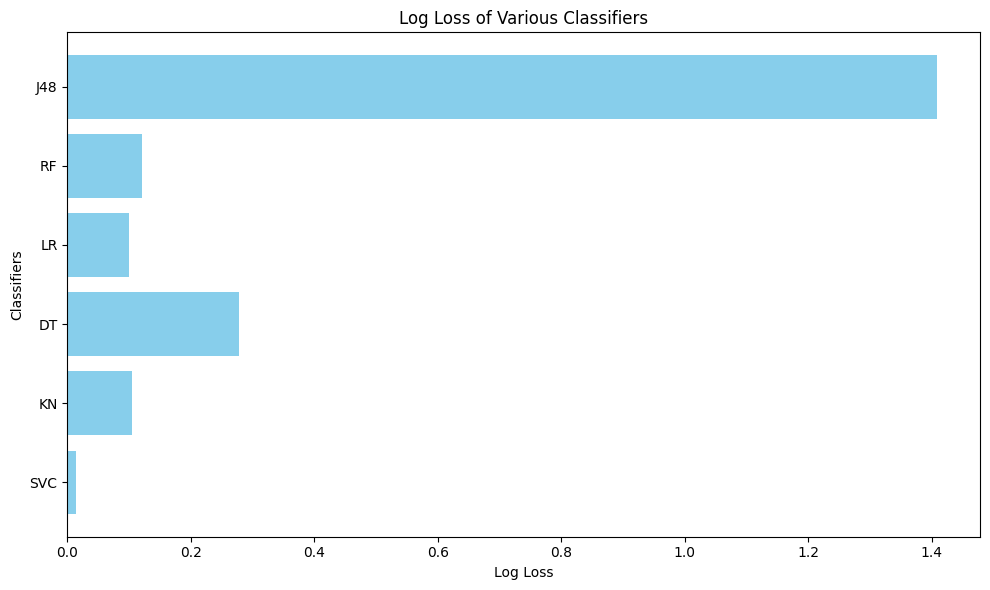

In [ ]:
import matplotlib.pyplot as plt

names = list(losses.keys())
values = list(losses.values())

plt.figure(figsize=(10,6))
plt.barh(names, values, color='skyblue')
plt.xlabel('Log Loss')
plt.ylabel('Classifiers')
plt.title('Log Loss of Various Classifiers')
plt.tight_layout()
plt.show()


In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
rfc = RandomForestClassifier()
from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('SVC', svc), ('RF', rfc)],voting='soft')


In [ ]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('SVC',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('RF', RandomForestClassifier())],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9940828402366864
Precision 1.0


In [ ]:
!pip install joblib



In [ ]:
print(tfidf.vocabulary_)

{'content': 11789, 'length': 25812, '3386': 2083, 'research': 35823, 'center': 10219, 'us': 43738, '10': 331, 'million': 28618, 'joint': 23392, 'ventur': 44199, 'appl': 6209, 'comput': 11501, 'inc': 21856, 'institut': 22273, 'system': 40795, 'scienc': 37566, 'nation': 29981, 'univers': 43400, 'singapor': 38629, 'locat': 26487, 'look': 26594, 'senior': 37907, 'speech': 39411, 'scientist': 37575, 'success': 40315, 'candid': 9728, 'expertis': 16342, 'linguist': 26231, 'includ': 21876, 'natur': 29998, 'languag': 25392, 'process': 34254, 'english': 15513, 'chines': 10620, 'statist': 39778, 'model': 28970, 'knowledg': 24558, 'gram': 19119, 'cach': 9556, 'requir': 35809, 'text': 41501, 'project': 34327, 'leader': 25624, 'two': 42769, 'follow': 17334, 'area': 6366, 'pars': 32369, 'lexic': 25949, 'databas': 12852, 'design': 13389, 'token': 42016, 'normal': 30824, 'prosod': 34422, 'analysi': 5733, 'substanti': 40283, 'phonolog': 33099, 'syntax': 40773, 'semant': 37842, 'acoust': 4659, 'phonet': 

In [ ]:
from joblib import dump, load
dump(voting, 'model.joblib')
dump(tfidf, 'vectorizer.joblib')




['vectorizer.joblib']

In [ ]:
import sklearn
print(sklearn.__version__)


1.2.2
